In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('new_car.csv')

In [2]:
print(dataset.shape)
dataset.dtypes

(151, 17)


Unnamed: 0            int64
car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [3]:
df_numeric = dataset.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'car_ID' 'symboling' 'wheelbase' 'carlength' 'carwidth'
 'carheight' 'curbweight' 'enginesize' 'boreratio' 'stroke'
 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']


In [4]:
X = dataset.drop(columns=['car_ID', 'price', 'Unnamed: 0'])
y = dataset['price']
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,9.2,156,5200,20,24
147,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24
148,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,85,5250,27,34
149,3,94.5,159.3,64.2,55.6,2254,109,3.19,3.40,8.5,90,5500,24,29


<Axes: >

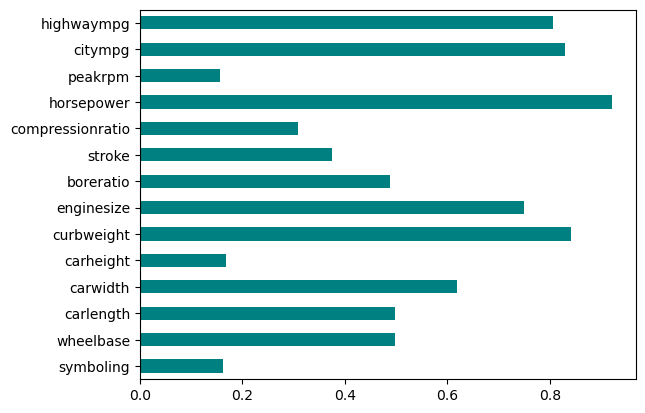

In [5]:
# метод фильтрации
from sklearn.feature_selection import mutual_info_regression

importance = mutual_info_regression(X, y)
feature_importance = pd.Series(importance, X.columns)
feature_importance.plot(kind='barh', color='teal')

In [6]:
feature_importance.sort_values(ascending=False)

horsepower          0.921336
curbweight          0.841804
citympg             0.828747
highwaympg          0.806004
enginesize          0.749585
carwidth            0.618182
wheelbase           0.497637
carlength           0.497401
boreratio           0.488554
stroke              0.374256
compressionratio    0.307857
carheight           0.168140
symboling           0.161660
peakrpm             0.155445
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [8]:
# рекурсивное исключение признаков (прямой метод)
# SVR - это SVM для регрессии
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

threshold = 5 # the number of most relevant features

lr = SVR(kernel="linear")

rfe = RFE(lr, n_features_to_select=threshold)
result=rfe.fit(X, y)
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
print(type(result))
selector_ind = result.get_support()
df_rfe = X.iloc[:, selector_ind]
print(df_rfe.columns)

<class 'sklearn.feature_selection._rfe.RFE'>
Index(['wheelbase', 'carlength', 'enginesize', 'compressionratio',
       'horsepower'],
      dtype='object')


На основе результатов, полученных двумя методами отбора признаков, мы делаем вывод, что наиболее полезные признаки это 'wheelbase'(колесная база), 'carlength'(длина автомобиля), 'enginesize'(размер двигателя), 'compressionratio'(коэффициент сжатия),'horsepower'(лошадиная сила). 